In [61]:
from sklearn.preprocessing import MinMaxScaler 
import pandas as pd

seeds = pd.read_csv('data/seeds.csv').dropna()
cols = ['area','perimeter','compactness','kernel_length','kernel_width','asymmetry_coefficient','groove_length']
seeds_scaled = seeds[cols]

# Deep Learning models work best when features are on "similar scales"
scaler = MinMaxScaler()
seeds_scaled = scaler.fit_transform(seeds_scaled)
seeds_scaled = pd.DataFrame(seeds_scaled, columns = ['area','perimeter','compactness','kernel_length','kernel_width','asymmetry_coefficient','groove_length'])
seeds[cols] = seeds_scaled[cols]

# The dataset is too small to be useful for deep learning
# So we'll oversample it to increase its size Hence we append the same dataset over it 
##We should always ensure that we create augments of the data
for i in range(1,3):
    seeds = pd.concat([seeds, pd.DataFrame(seeds)], ignore_index=True)

# Display a random sample of 10 observations
sample = seeds.sample(10)
sample

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,groove_length,species
295,0.725212,0.760331,0.715971,0.717342,0.727726,0.218167,0.826194,1
7,0.332389,0.349174,0.753176,0.293356,0.478974,0.251583,0.236829,0
733,0.811143,0.871901,0.577132,0.827703,0.749109,0.337009,0.841950,1
418,0.118036,0.165289,0.399274,0.155405,0.146828,0.368344,0.258493,2
115,0.799811,0.834711,0.701452,0.854167,0.776194,0.192812,0.809453,1
613,0.021719,0.086777,0.158802,0.158221,0.000000,0.531524,0.280650,2
101,0.698772,0.712810,0.826679,0.557995,0.758375,0.169408,0.648941,1
714,0.842304,0.888430,0.634301,0.826014,0.834640,0.285649,0.820286,1
33,0.316336,0.363636,0.587114,0.386261,0.370634,0.176689,0.242738,0
144,0.116147,0.204545,0.175136,0.233671,0.104775,0.481855,0.324471,2


In [62]:
type(seeds_scaled)

pandas.core.frame.DataFrame

In [63]:
from sklearn.model_selection import train_test_split

features = ['area','perimeter','compactness','kernel_length','kernel_width','asymmetry_coefficient','groove_length']
label = 'species'
   
# Split data 70%-30% into training set and test set
x_train, x_test, y_train, y_test = train_test_split(seeds[features].values,
                                                    seeds[label].values,
                                                    test_size=0.30,
                                                    random_state=0)

print ('Training Set: %d, Test Set: %d \n' % (len(x_train), len(x_test)))
print("Sample of features and labels:")

# Take a look at the first 25 training features and corresponding labels
for n in range(0,24):
    print(x_train[n], y_train[n])

Training Set: 588, Test Set: 252 

Sample of features and labels:
[0.36543909 0.40082645 0.66878403 0.27533784 0.53243051 0.26484547
 0.25849335] 0
[0.06421152 0.11570248 0.30671506 0.10641892 0.09479686 0.46079132
 0.23682915] 2
[0.04060434 0.12190083 0.09800363 0.23986486 0.05060584 0.77622905
 0.31708518] 2
[0.03021719 0.08057851 0.26406534 0.10641892 0.03207413 0.44388823
 0.21516494] 2
[0.01888574 0.10743802 0.02359347 0.23536036 0.01282965 0.61070876
 0.3323486 ] 2
[0.13786591 0.20661157 0.30399274 0.20720721 0.15466857 0.54907748
 0.25947809] 2
[0.3871577  0.42975207 0.65154265 0.37387387 0.44832502 0.36678412
 0.3446578 ] 0
[0.06326723 0.12396694 0.24863884 0.1615991  0.05702067 0.59419574
 0.28212703] 2
[0.7884797  0.84297521 0.60707804 0.8704955  0.7191732  0.55895929
 0.90743476] 1
[0.0727101  0.1322314  0.27313975 0.15540541 0.0890948  0.42685511
 0.36632201] 2
[0.19169027 0.26033058 0.36297641 0.28772523 0.2002851  0.33037746
 0.35056622] 2
[0.2483475  0.29545455 0.5435571

In [43]:
!pip3 install torch

In [64]:
import torch

#nn contains different classess that help you build neural network models
import torch.nn as nn

#torch.utils.data allows us to use preloaded datasets or our own data
import torch.utils.data as td

# Set random seed for reproducability
torch.manual_seed(0)

print("Libraries imported - ready to use PyTorch", torch.__version__)

Libraries imported - ready to use PyTorch 2.2.1+cpu


In [65]:
# Converting the array into a tensor type
train_x = torch.Tensor(x_train).float()
train_y = torch.Tensor(y_train).long()

#Creating a ready to use class to represent your data as list of tensors
train_ds = td.TensorDataset(train_x,train_y)

#creating an iterable dataset object and iterating over it in batches, which are then fed into the model for processing
train_loader = td.DataLoader(train_ds, batch_size=20,
    shuffle=False, num_workers=1)

# Create a dataset and loader for the test data and labels
test_x = torch.Tensor(x_test).float()
test_y = torch.Tensor(y_test).long()
test_ds = td.TensorDataset(test_x,test_y)
test_loader = td.DataLoader(test_ds, batch_size=20,
    shuffle=False, num_workers=1)

print('Ready to load data')

Ready to load data


In [66]:
# Number of hidden layer nodes
hl = 10

# Define the neural network
class SeedNet(nn.Module):
    def __init__(self):
        super(SeedNet, self).__init__()
        self.fc1 = nn.Linear(len(features), hl)
        self.fc2 = nn.Linear(hl, hl)
        self.fc3 = nn.Linear(hl, 3)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        return x

# Create a model instance from the network
model = SeedNet()
print(model)

SeedNet(
  (fc1): Linear(in_features=7, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=10, bias=True)
  (fc3): Linear(in_features=10, out_features=3, bias=True)
)


In [67]:
def train(model, data_loader, optimizer):
    # Set the model to training mode
    model.train()
    train_loss = 0
    
    for batch, tensor in enumerate(data_loader):
        data, target = tensor
        #feedforward
        optimizer.zero_grad()
        out = model(data)
        loss = loss_criteria(out, target)
        train_loss += loss.item()

        # backpropagate
        loss.backward()
        optimizer.step()

    #Return average loss
    avg_loss = train_loss / (batch+1)
    print('Training set: Average loss: {:.6f}'.format(avg_loss))
    return avg_loss
           
            
def test(model, data_loader):
    # Switch the model to evaluation mode (so we don't backpropagate)
    model.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad():
        batch_count = 0
        for batch, tensor in enumerate(data_loader):
            batch_count += 1
            data, target = tensor
            # Get the predictions
            out = model(data)

            # calculate the loss
            test_loss += loss_criteria(out, target).item()

            # Calculate the accuracy
            _, predicted = torch.max(out.data, 1)
            correct += torch.sum(target==predicted).item()
            
    # Calculate the average loss and total accuracy for this epoch
    avg_loss = test_loss/batch_count
    print('Validation set: Average loss: {:.6f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        avg_loss, correct, len(data_loader.dataset),
        100. * correct / len(data_loader.dataset)))
    
    # return average loss for the epoch
    return avg_loss

# Specify the loss criteria (we'll use CrossEntropyLoss for multi-class classification)
loss_criteria = nn.CrossEntropyLoss()

# Use an "Adam" optimizer to adjust weights
# (see https://pytorch.org/docs/stable/optim.html#algorithms for details of supported algorithms)
learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
optimizer.zero_grad()

# We'll track metrics for each epoch in these arrays
epoch_nums = []
training_loss = []
validation_loss = []

# Train over 50 epochs
epochs = 50
for epoch in range(1, epochs + 1):

    # print the epoch number
    print('Epoch: {}'.format(epoch))
    
    # Feed training data into the model to optimize the weights
    train_loss = train(model, train_loader, optimizer)
    
    # Feed the test data into the model to check its performance
    test_loss = test(model, test_loader)
    
    # Log the metrics for this epoch
    epoch_nums.append(epoch)
    training_loss.append(train_loss)
    validation_loss.append(test_loss)

Epoch: 1
Training set: Average loss: 1.093958
Validation set: Average loss: 1.110836, Accuracy: 67/252 (27%)

Epoch: 2
Training set: Average loss: 1.080296
Validation set: Average loss: 1.095639, Accuracy: 67/252 (27%)

Epoch: 3
Training set: Average loss: 1.061794
Validation set: Average loss: 1.073913, Accuracy: 94/252 (37%)

Epoch: 4
Training set: Average loss: 1.035500
Validation set: Average loss: 1.045192, Accuracy: 153/252 (61%)

Epoch: 5
Training set: Average loss: 1.004286
Validation set: Average loss: 1.021947, Accuracy: 153/252 (61%)

Epoch: 6
Training set: Average loss: 0.971219
Validation set: Average loss: 0.996661, Accuracy: 155/252 (62%)

Epoch: 7
Training set: Average loss: 0.935217
Validation set: Average loss: 0.969107, Accuracy: 155/252 (62%)

Epoch: 8
Training set: Average loss: 0.896564
Validation set: Average loss: 0.939594, Accuracy: 155/252 (62%)

Epoch: 9
Training set: Average loss: 0.855815
Validation set: Average loss: 0.907967, Accuracy: 155/252 (62%)

Epoc

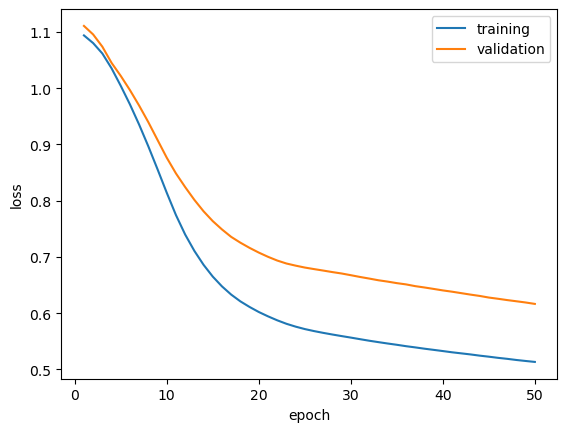

In [68]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()